This notebook was made to use the CalMS21 Task1 dataset, as well as the 'syllables' data we have from using the keypoint-MoSeq model to create 2 types of inputs for predicting models:
For each annotated behaviour at each time point:
1. Syllables of the last 'x' time points
2. last 'x' syllables and the duration of each syllable before this time point

## Set up

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Extraction

### CalMS21 Data extraction

In [5]:
import pickle

folder_path = '/content/drive/MyDrive/NMA_Project/'

with open(folder_path+'coordinates_resident.pkl', 'rb') as file:
    coordinates_resident = pickle.load(file)
with open(folder_path+'confidences_resident.pkl', 'rb') as file:
    confidences_resident= pickle.load(file)
with open(folder_path+'coordinates_intruder.pkl', 'rb') as file:
    coordinates_intruder= pickle.load(file)
with open(folder_path+'confidences_intruder.pkl', 'rb') as file:
    confidences_intruder= pickle.load(file)
with open(folder_path+'annotations.pkl', 'rb') as file:
    annotations= pickle.load(file)

print(f'Dictionaries imported from {folder_path}')

Dictionaries imported from /content/drive/MyDrive/NMA_Project/


In [6]:
bodyparts = ['nose', 'left ear', 'right ear', 'neck', 'left hip', 'right hip', 'tail base']
vocab = {0 :'attack' , 1 : 'investigation', 2 : 'mount', 3: 'other'}

### Behavioural States Data Extraction

In [7]:
## RESIDENT DATA EXTRACTION

# Define the path to the folder containing the CSV files for resident
resident_folder_path = '/content/drive/MyDrive/NMA_Project_v1/2024_07_24-06_25_07/results'

# Initializing an empty dictionary
resident_data_dict = {}

# List all files in the folder
for filename in os.listdir(resident_folder_path):
    if filename.endswith('.csv'):

        # Construct full file path
        file_path = os.path.join(resident_folder_path, filename)
        df = pd.read_csv(file_path)
        #data_frames.append(df)
        resident_data_dict['m'+filename[18:20]] = df

#Sorting the Dictionary by Assay (mouse 1 to 70)
resident_data_dict = {k: resident_data_dict[k] for k in sorted(resident_data_dict)}

# Print the dictionary keys to verify
#print(data_dict.keys())

In [8]:
## INTRUDER DATA EXTRACTION

# Define the path to the folder containing the CSV files for intruder
intruder_folder_path = '/content/drive/MyDrive/NMA_Project_v1_Intruder/2024_07_24-08_25_39/results'

# Initializing an empty dictionaries
intruder_data_dict = {}

# List all files in the folder
for filename in os.listdir(intruder_folder_path):
    if filename.endswith('.csv'):

        # Construct full file path
        file_path = os.path.join(intruder_folder_path, filename)
        df = pd.read_csv(file_path)
        #data_frames.append(df)
        intruder_data_dict['m'+filename[18:20]] = df

#Sorting the Dictionary by Assay (mouse 1 to 70)
intruder_data_dict = {k: intruder_data_dict[k] for k in sorted(intruder_data_dict)}

# Print the dictionary keys to verify
#print(data_dict.keys())

In [9]:
for i, j in zip(resident_data_dict.keys(), intruder_data_dict.keys()):
  print(i + " " + j)

m01 m01
m02 m02
m03 m03
m04 m04
m05 m05
m06 m06
m07 m07
m08 m08
m09 m09
m10 m10
m11 m11
m12 m12
m13 m13
m14 m14
m15 m15
m16 m16
m17 m17
m18 m18
m19 m19
m20 m20
m21 m21
m22 m22
m23 m23
m24 m24
m25 m25
m26 m26
m27 m27
m28 m28
m29 m29
m30 m30
m31 m31
m32 m32
m33 m33
m34 m34
m35 m35
m36 m36
m37 m37
m38 m38
m39 m39
m40 m40
m41 m41
m42 m42
m43 m43
m44 m44
m45 m45
m46 m46
m47 m47
m48 m48
m49 m49
m50 m50
m51 m51
m52 m52
m53 m53
m54 m54
m55 m55
m56 m56
m57 m57
m58 m58
m59 m59
m60 m60
m61 m61
m62 m62
m63 m63
m64 m64
m65 m65
m66 m66
m67 m67
m68 m68
m69 m69
m70 m70


In [10]:
intruder_data_dict['m01']

,syllable,centroid x,centroid y,heading,latent_state 0,latent_state 1,latent_state 2,latent_state 3,latent_state 4,latent_state 5
0,4,838.6132,167.5018,1.0472,0.1590,1.9036,-0.3148,0.3319,0.4396,0.2759
1,4,841.7831,173.1070,1.0423,0.3511,1.8420,-0.4770,-0.1412,0.5817,0.2339
2,4,843.6136,175.6028,1.0846,0.2051,1.5117,-0.5453,-0.8047,0.3580,0.1772
3,4,838.0404,175.4459,1.1923,0.1370,1.2557,0.1087,-0.2941,0.2785,-0.0234
4,4,835.2946,173.7734,1.2336,-0.0318,0.8035,0.4840,-0.4966,0.3083,0.3140
...,...,...,...,...,...,...,...,...,...,...
21359,10,201.4019,162.7129,-2.9736,0.1019,0.1018,0.0985,-0.2855,-0.6649,0.1408
21360,10,200.8718,162.1154,-2.9667,0.1138,0.0689,0.1312,-0.5372,-0.7449,0.2281
21361,10,200.4202,162.3526,-2.9673,0.1481,0.0781,0.0894,-0.6983,-0.9106,0.1790
21362,10,200.9461,162.5589,-2.9769,0.1635,0.0394,0.1215,-0.7060,-0.9208,0.0686


## Understanding Data

### Length of assays

In [11]:
## Lengths of each Assay:
assay_lengths = [len(value) for value in resident_data_dict.values()]

In [12]:
assay_lengths

[21364,
 19343,
 13222,
 7433,
 5641,
 3029,
 10025,
 11407,
 8332,
 8666,
 4260,
 7190,
 2263,
 8994,
 7406,
 3692,
 6200,
 6127,
 4461,
 3714,
 11322,
 9792,
 1838,
 8899,
 3770,
 3632,
 1987,
 1036,
 3041,
 1607,
 5096,
 5763,
 2497,
 1062,
 4879,
 96,
 5133,
 2796,
 3188,
 2643,
 1440,
 3351,
 974,
 3394,
 2713,
 5065,
 2751,
 1213,
 2885,
 1283,
 17326,
 17946,
 17472,
 17319,
 17637,
 16420,
 18617,
 18423,
 5495,
 4755,
 3996,
 7754,
 13170,
 7150,
 8103,
 7410,
 7024,
 9838,
 11431,
 12537]

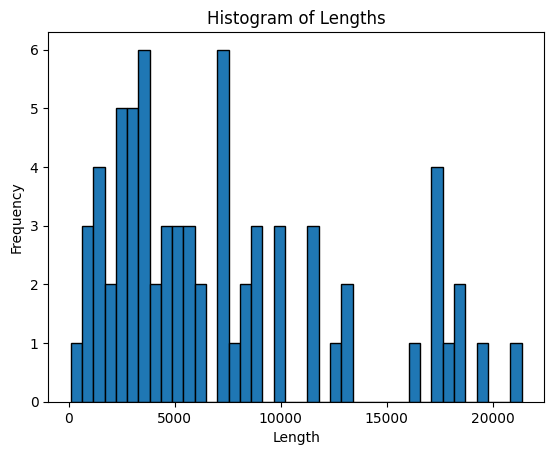

In [13]:
##Plotting
plt.hist(assay_lengths, bins=40, edgecolor='black')

# Add title and labels
plt.title('Histogram of Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [ ]:
count = len([length for length in assay_lengths if length < 900])
count

1

By trying out multiple lengths,it seems like only 1 assay is very abnormal with less than 100 frames and every other trial is atleast more than 900 frames. So, I am going to drop this trial in the pre processing step

## Pre Processing

### Test/rough work

In [ ]:
resident_data_dict['m01'][0:100]

,syllable,centroid x,centroid y,heading,latent_state 0,latent_state 1,latent_state 2,latent_state 3,latent_state 4,latent_state 5,latent_state 6
0,37,751.7230,223.0669,-0.0998,0.0387,-0.9746,0.8159,0.1022,0.2772,1.3908,0.0187
1,37,755.3056,226.6347,-0.1365,-0.0209,-1.0740,0.6898,-0.0411,0.4498,1.8800,0.2515
2,37,757.4348,224.3877,-0.2425,0.0259,-1.2799,0.8319,-0.1008,0.0286,1.8677,0.2165
3,37,757.5932,219.0045,-0.3288,-0.0305,-1.2563,0.9369,-0.0328,-0.0557,2.2081,0.2456
4,37,755.0227,213.2727,-0.3233,-0.2736,-0.9618,1.3122,-0.1357,0.4656,2.6270,0.2393
...,...,...,...,...,...,...,...,...,...,...,...
95,0,317.0336,411.3804,2.6894,0.7140,0.0782,0.2164,0.4297,0.7747,0.7712,-0.5182
96,0,316.7702,410.4124,2.6554,0.7499,-0.0101,0.0657,0.2907,0.6611,0.6826,-0.4236
97,0,316.3033,409.3446,2.6356,0.7675,-0.1731,0.0857,0.3073,0.4441,0.6736,-0.3168
98,0,317.2673,410.0672,2.6174,0.7278,-0.2444,0.0227,0.2796,0.4401,0.5606,-0.1256


from matplotlib import pyplot as plt
_df_0['syllable'].plot(kind='hist', bins=20, title='syllable')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['centroid x'].plot(kind='hist', bins=20, title='centroid x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['centroid y'].plot(kind='hist', bins=20, title='centroid y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['heading'].plot(kind='hist', bins=20, title='heading')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='syllable', y='centroid x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='centroid x', y='centroid y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='centroid y', y='heading', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='heading', y='latent_state 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['syllable'].plot(kind='line', figsize=(8, 4), title='syllable')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['centroid x'].plot(kind='line', figsize=(8, 4), title='centroid x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['centroid y'].plot(kind='line', figsize=(8, 4), title='centroid y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['heading'].plot(kind='line', figsize=(8, 4), title='heading')
plt.gca().spines[['top', 'right']].set_visible(False)

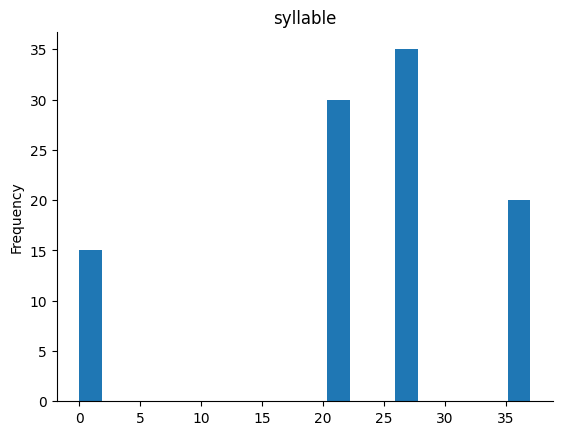

In [ ]:
from matplotlib import pyplot as plt
_df_0['syllable'].plot(kind='hist', bins=20, title='syllable')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
keys = [key for key in resident_data_dict.keys()]
#len(keys)
#keys

In [ ]:
resident_data_dict['m01'][:100].values[:,:4].shape
#100 x 11

(100, 4)

In [ ]:
a = resident_data_dict['m01'][:100].values[:,:4]
b = intruder_data_dict['m01'][:100].values[:,:4]
c = annotations['m01'][:100].reshape(100,1)
print(type(a))
print(type(b))
print(type(c))
stacked = np.hstack((a,b,c))
stacked.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(100, 9)

In [ ]:
dist = np. array([np.sqrt((a[x,1]-b[x,1])**2 + (a[x,2]-b[x,2])**2) for x in range(100)]).reshape(100,1)

### Creating input data for models:

#### Dividing by frames/Time points:
For every Behavioural annotation at time *t*, we are creating:
1. a matrix for time *(t-101, t-1)* with the following features: (Resident_behavioural_state, resident_heading, intruder_behavioural_state, intruder_heading, distance_between_the_mice, resident_behavioural_annotation)
2. an array of behavioural annotations at time t
3. an array of behavioural states at time t

1 will be used as input to a model and 2 and 3 can be outputs. (we might have to remove the behvioural annotations in the matrix)


In [14]:
## Creating Input Matrix for required time scale

#Setting the predicted optimal time scale (in terms of number of frames)
#Note: The average number of frame for each behaviour state is 12
T = 100

final_dataset = []
next_behv = []
k=0
keys = [key for key in resident_data_dict.keys()]
for i in range(len(keys)):       # looping through each assay
  if(len(resident_data_dict[keys[i]])-1<T):       # Checking if the entire assay itself is less than our time scale
    continue
  else:
    for j in range(len(resident_data_dict[keys[i]])-1-T):
     res_data = resident_data_dict[keys[i]][j:j+T].values[:,:4]
     intr_data = intruder_data_dict[keys[i]][j:j+T].values[:,:4]
     dist = np.array([np.sqrt((res_data[x,1]-intr_data[x,1])**2 + (res_data[x,2]-intr_data[x,2])**2) for x in range(T)]).reshape(T,1)
     behv_ann = annotations[keys[i]][j:j+T].reshape(T,1)
     #res_latent_states = resident_data_dict[keys[i]][j:j+T].values[:,4:11]
     final_dataset.append(np.hstack((res_data[:,(0,3)],intr_data[:,(0,3)],dist,behv_ann)))
     next_behv.append(annotations[keys[i]][j+T+1])
     k+=1
print(k)

500673


In [15]:
# converting list to an np.array and removing the behavioural annotations from the matrix (which is in the last column: column 6 )
final_input_matrix = np.array(final_dataset)[:,:,:5]
final_input_matrix.shape

# Features :
# 1. Resident_behavioural_state
# 2. resident_heading
# 3. intruder_behavioural_state
# 4. intruder_heading
# 5. distance_between_the_mice

(500673, 100, 5)

In [16]:
np.array(next_behv).shape

(500673,)

In [17]:
## Creating a dictionary with input and output:

time_frame_dataset = {}
time_frame_dataset['input'] = final_input_matrix
time_frame_dataset['output'] = np.array(next_behv)

In [18]:
## Exporting dataset as a .pkl file
import pickle

folder_path = '/content/drive/MyDrive/NMA_Project/'

with open(folder_path+'time_frame_dataset.pkl', 'wb') as file:
    pickle.dump(time_frame_dataset, file)


#### Dividing by state sequences
Here, I am creating a dictionary ( *final_sequence_dict* ) where each key corresponds to each video/assay.

The Value for each key is a matrix:
- We divide the assay into sequences of state pairs (distinct pairs of states of both the mice)
- So, each row corresponds to a pair of resident_mouse_state and intruder_mouse_state
- Each row has the following features (in this order):
 -  Resident mouse state
 -  Intruder mouse state
 -  Duration of this pair of states (in number of frames)
 -  The average distance between the mice in this sequence
 -  The frame number when this pair of states ended (so that we can allign it with other data if required)

In [19]:
## Behavioural states sequence extractions

final_sequence_dict = {}

seq_t = 0
dist_sum = 0
keys = [key for key in resident_data_dict.keys()]

for i in range(len(keys)):
  res_states = resident_data_dict[keys[i]].values[:,0]
  intr_states = intruder_data_dict[keys[i]].values[:,0]
  this_sequence = []
  beh_ann = []
  for j in range(len(resident_data_dict[keys[i]])):
    if(j!=0):
      x_dist = resident_data_dict[keys[i]].values[j-1,1] - intruder_data_dict[keys[i]].values[j-1,1]
      y_dist = resident_data_dict[keys[i]].values[j-1,2] - intruder_data_dict[keys[i]].values[j-1,2]
      dist = np.sqrt( x_dist**2 + y_dist**2 )
      dist_sum += dist
      if(res_states[j]==res_states[j-1] and intr_states[j]==intr_states[j-1]):
        seq_t+=1
      else:
        dist_avg = dist_sum/seq_t
        this_sequence.append([res_states[j-1], intr_states[j-1], seq_t, dist_avg, j-1])
        seq_t = 1
        dist_sum = 0
  final_sequence_dict[keys[i]] = this_sequence


In [20]:
final_sequence_dict['m01']

[[37.0, 4.0, 14, 97.80646662974058, 14],
 [37.0, 8.0, 5, 87.97506611106405, 19],
 [26.0, 8.0, 26, 188.89940291426723, 45],
 [26.0, 34.0, 9, 219.61230411989143, 54],
 [22.0, 34.0, 1, 180.2733428002321, 55],
 [22.0, 3.0, 8, 180.75474341095307, 63],
 [22.0, 7.0, 5, 171.61317352673433, 68],
 [22.0, 2.0, 16, 184.5773867705841, 84],
 [0.0, 2.0, 15, 191.0594786540749, 99],
 [4.0, 8.0, 4, 152.32708348863412, 103],
 [3.0, 8.0, 5, 126.82206344642164, 108],
 [26.0, 8.0, 9, 124.79997032907062, 117],
 [26.0, 9.0, 17, 246.63406168130732, 134],
 [26.0, 7.0, 16, 160.014893591724, 150],
 [22.0, 7.0, 9, 152.72605935984532, 159],
 [22.0, 21.0, 5, 158.4949048806645, 164],
 [22.0, 9.0, 10, 136.73399037300598, 174],
 [19.0, 9.0, 4, 94.4381145349576, 178],
 [27.0, 7.0, 22, 81.68813529759349, 200],
 [27.0, 23.0, 5, 74.3482134612611, 205],
 [19.0, 23.0, 21, 89.27585323012838, 226],
 [19.0, 8.0, 27, 160.44710607233125, 253],
 [18.0, 8.0, 26, 162.71168453702418, 279],
 [22.0, 8.0, 2, 134.80876049473488, 281],
 [

In [22]:
##Behavioural annotations for state sequences
from scipy import stats

beh_ann_seq_dict = {}


keys = [key for key in resident_data_dict.keys()]
for i in range(2):#len(keys)):
  beh_ann_seq = []
  for j in [row[4] for row in final_sequence_dict[keys[i]]]:
    #ann = [ x for x in annotations[keys[i]][j:j+3] ]
    #Beh_ann_seq.append(stats.mode(ann).mode[0])
    beh_ann_seq.append([annotations[keys[i]][j+1],j+1])
  beh_ann_seq_dict[keys[i]] = beh_ann_seq

## beh_ann_seq_dict:
#     A dictionary with keys corresponding to each assay
#     Each value is a matrix: (each row corresponding to the frame at which a sequence ended)
#       Each row has 2 values: behavioural annotation at the next state, the frame number of that annotation (just so we know it is the next frame after the sequence)


In [23]:
beh_ann_seq_dict['m01']

[[1, 15],
 [1, 20],
 [1, 46],
 [1, 55],
 [1, 56],
 [1, 64],
 [1, 69],
 [1, 85],
 [1, 100],
 [1, 104],
 [1, 109],
 [1, 118],
 [3, 135],
 [1, 151],
 [1, 160],
 [1, 165],
 [1, 175],
 [1, 179],
 [1, 201],
 [1, 206],
 [1, 227],
 [1, 254],
 [1, 280],
 [1, 282],
 [1, 296],
 [1, 345],
 [1, 369],
 [1, 380],
 [1, 391],
 [1, 418],
 [1, 420],
 [1, 435],
 [1, 446],
 [1, 447],
 [1, 456],
 [1, 460],
 [1, 461],
 [1, 466],
 [1, 481],
 [1, 494],
 [1, 495],
 [1, 499],
 [1, 504],
 [1, 517],
 [1, 533],
 [1, 548],
 [1, 557],
 [1, 574],
 [1, 589],
 [1, 622],
 [1, 631],
 [3, 656],
 [1, 664],
 [1, 685],
 [1, 688],
 [1, 694],
 [1, 697],
 [3, 726],
 [3, 730],
 [1, 752],
 [1, 774],
 [1, 799],
 [1, 800],
 [1, 811],
 [1, 825],
 [1, 843],
 [1, 846],
 [1, 852],
 [1, 854],
 [1, 855],
 [1, 858],
 [3, 916],
 [3, 928],
 [3, 929],
 [3, 934],
 [3, 943],
 [1, 957],
 [1, 963],
 [1, 967],
 [1, 1013],
 [1, 1015],
 [1, 1035],
 [1, 1038],
 [3, 1046],
 [3, 1056],
 [3, 1080],
 [3, 1104],
 [3, 1109],
 [3, 1115],
 [3, 1119],
 [3, 11

In [24]:
## Exporting dataset as a .pkl file
import pickle

folder_path = '/content/drive/MyDrive/NMA_Project/'

with open(folder_path+'final_sequence_dict.pkl', 'wb') as file:
    pickle.dump(final_sequence_dict, file)
with open(folder_path+'beh_ann_seq_dict.pkl', 'wb') as file:
    pickle.dump(beh_ann_seq_dict, file)

### Code to Import the data


In [ ]:
## Code to import the dataset:

import pickle

folder_path = '/content/drive/MyDrive/NMA_Project/'

#with open(folder_path+'time_frame_dataset.pkl', 'rb') as file:
#    time_frame_dataset = pickle.load(file)
with open(folder_path+'final_sequence_dict.pkl', 'rb') as file:
    final_sequence_dict= pickle.load(file)
with open(folder_path+'beh_ann_seq_dict.pkl', 'rb') as file:
    beh_ann_seq_dict= pickle.load(file)